In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scripts.helpful_scripts import annual, cash_flow
from numpy_financial import numpy_financial as npf

css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

In [2]:
raw_materials = pd.DataFrame({'Component': ['Ethylbenzene', 'Waste Water', 'Catalyst'],
                                'Price': [0.5, 0.005, 1], #($/lb_m)
                                'Flowrate': [
                                    (((22001.6)+(24682.8)*0.959)-(45851.5)*0.478)*8000, 49246.63966*8000, 22857.14]}).reset_index() # lb_m/op_yr

products = pd.DataFrame({'Component': ['Styrene', 'Toluene'],
                          'Price': [0.62, 0.44], #($/lb_m)
                          'Flowrate': [(45851.5)*0.494*8000,
                                        (45851.5)*0.019*8000]}).reset_index() # lb_m/op_yr
                    
utilities = pd.DataFrame({'Utility': ['LPS', 'MPS', 'HPS', 'Natural Gas', 'Electricity', 'BFW', 'CW', 'RW'],
                          'Price': [13.28, 14.19, 17.70, 11.00, 0.06, 2.45/1000, 0.354, 4.43],
                          'Unit': ['GJ', 'GJ', 'GJ', 'GJ', 'kW-h', 'kg', 'GJ', 'GJ'],
                          'Usage': [46.6746*8000, 0, 0, 61.5228*8000, 3552, 0, (104.273+4.38627)*8000, 0]}).reset_index()

credits = pd.DataFrame({'Utility': ['LPS', 'MPS', 'HPS', 'Natural Gas', 'Fuel', 'Electricity', 'BFW', 'CW', 'RW'],
                          'Price': [13.28, 14.19, 17.70, 11.00, 9.00, 0.06, 2.45/1000, 0.354, 4.43],
                          'Unit': ['GJ', 'GJ', 'GJ', 'GJ', 'GJ', 'kW-h', 'kg', 'GJ', 'GJ'],
                          'Usage': [0, 0, (2.892376349)*8000, 0, (224261.8+8241.8), 0, 0, 0, 0]}).reset_index()

total_installed_cost = (8_464_000+200_000+100_000+600_000)
waste_treatment = 247.81*8000
interest = 0.2 # interest rate
n = 10 # project life

In [3]:
print((45851.5)*0.494)

22650.641


In [4]:
print('Raw Materials')
display(raw_materials)
print('\nProducts')
display(products)
print('\nUtilities')
display(utilities)
print('\nCredits')
display(credits)

Raw Materials


,index,Component,Price,Flowrate
0,0,Ethylbenzene,0.500,1.900431e+08
1,1,Waste Water,0.005,3.939731e+08
2,2,Catalyst,1.000,2.285714e+04



Products


,index,Component,Price,Flowrate
0,0,Styrene,0.62,181205128.0
1,1,Toluene,0.44,6969428.0



Utilities


,index,Utility,Price,Unit,Usage
0,0,LPS,13.28000,GJ,373396.80
1,1,MPS,14.19000,GJ,0.00
2,2,HPS,17.70000,GJ,0.00
3,3,Natural Gas,11.00000,GJ,492182.40
4,4,Electricity,0.06000,kW-h,3552.00
5,5,BFW,0.00245,kg,0.00
6,6,CW,0.35400,GJ,869274.16
7,7,RW,4.43000,GJ,0.00



Credits


,index,Utility,Price,Unit,Usage
0,0,LPS,13.28000,GJ,0.000000
1,1,MPS,14.19000,GJ,0.000000
2,2,HPS,17.70000,GJ,23139.010792
3,3,Natural Gas,11.00000,GJ,0.000000
4,4,Fuel,9.00000,GJ,232503.600000
5,5,Electricity,0.06000,kW-h,0.000000
6,6,BFW,0.00245,kg,0.000000
7,7,CW,0.35400,GJ,0.000000
8,8,RW,4.43000,GJ,0.000000


In [5]:
finances, annual_cost = annual(products, raw_materials, total_installed_cost, 0.15, n, utilities, waste_treatment, credits)
finances

,0,1
0,Credits,"$2,502,092.89"
1,Revenue,"$115,413,727.68"
2,Raw materials,"-$97,014,275.53"
3,Equipment loan,"-$1,865,796.31"
4,Utilities,"-$10,680,652.08"
5,Waste Treatment,"-$1,982,480.00"
6,Profit,"$6,372,616.65"


In [6]:
npv = npf.npv(0.2, annual_cost)
print('Net Present Value: ${:,.2f}'.format(npv))

Net Present Value: $32,060,420.92


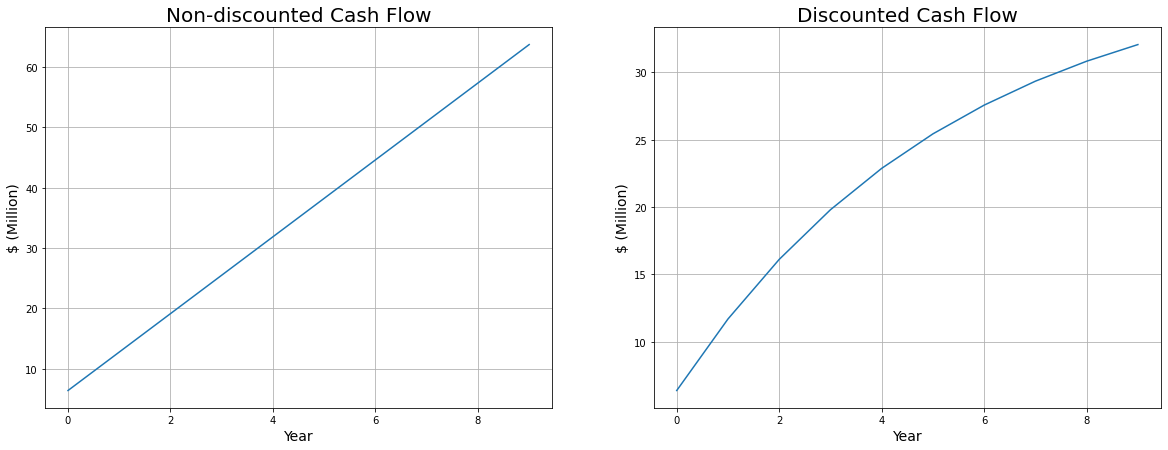

In [7]:
cash_flow(annual_cost, 0.2)

In [8]:
# Cash Flow Calculator and graph
# Add Monte Carlo Simulation
# Equipment Pricing